In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
len(STOPWORDS)

179

In [6]:
vocab_size = 10000
embedding_dim = 64
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [7]:
articles = []
labelsList = []

#raw_data = pd.read_csv('/content/drive/My Drive/new_transaction.csv')

with open("new_data_.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labelsList.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labelsList))
print(len(articles))

39981
39981


In [8]:
import pandas as pd
raw_data = pd.read_csv('new_data.csv')
raw_data = raw_data.dropna()
emotion_list = raw_data['emotions'].tolist()
sentence_list = raw_data['sentences'].tolist()

for word in STOPWORDS:
    token = ' ' + word + ' '
    res = list(map(lambda token: str.replace(token, ' ', ' '), sentence_list))
print(res[0:3])

['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


In [9]:
raw_data.isnull().sum().sum()

0

In [10]:
sentenceFiltered = []
for w in sentence_list:
    if w not in STOPWORDS:
        sentenceFiltered.append(w)
    else:
        #print(sentence_list2.index(w))
        final_emotion_list.pop(sentence_list.index(w))
print(len(sentenceFiltered))    
len(emotion_list)

47315


47315

In [11]:
#for d in labelsSet:
#	print(d)
 
print(labelsList[1000:1010])

['worry', 'neutral', 'worry', 'happiness', 'worry', 'sadness', 'neutral', 'sadness', 'sadness', 'neutral']


In [12]:
data = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6, 'empty':7,
       'enthusiasm':8, 'neutral':9, 'worry':10, 'surprise':11, 'love':12, 'fun':13, 'hate':14, 'happiness':15,
       'boredom':16, 'relief':17}

xx = [data[item] for item in emotion_list]

print(xx)
labelsTensor1 = tf.Variable(xx, tf.int32)
ys1 = tf.one_hot(labelsTensor1, 17)
print(ys1)

print(data)

KeyError: 0

In [56]:
labels = []
#labelListt = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
#I might need a sorted list or set
for item in labelsList:
    labels.append(labelsList.index(item))
#I need the index of each element in the list, the labels
#The plan is to hot encode each category
#For each item in labelList find its index in the sorted set of LabelList
#This would give the probability value of each label

set1 = set(labelsList)

labelsTensor = tf.Variable(labels, tf.int32)
ys = tf.one_hot(labelsTensor, 17)
print(ys[0:10])
print(labels[0:10])
#print(set1)

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 17), dtype=float32)
[0, 1, 1, 3, 4, 5, 1, 5, 1, 1]


In [29]:
ys[10]
#len(ys)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [31]:
ys = tf.keras.utils.to_categorical(emotion_list, num_classes=18)

In [38]:
train_size = int(len(sentenceFiltered) * training_portion)

train_articles = sentenceFiltered[0: train_size]
train_labels = ys[0: train_size]

validation_articles = sentenceFiltered[train_size:]
validation_labels = ys[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

37852
37852
37852
9463
9463


In [33]:
validation_labels.size

170334

In [34]:
print(validation_labels.shape)

(9463, 18)


In [45]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [46]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [47]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape) 

9463
(9463, 50)


In [42]:
print(set(labels))

NameError: name 'labels' is not defined

In [30]:
#This cell doesn't need to be run IMO

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

AttributeError: 'int' object has no attribute 'lower'

In [48]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[101]))
print('---')
print(train_articles[101])

when i saw the list of books to read for an <OOV> course i á thought oh god how will i ever <OOV> it ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
When I saw the list of books to read for an acccouting course, I á thought \ Oh God how will I ever manaage it!\""


In [49]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(18, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                1170      
Total params: 715,474
Trainable params: 715,474
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 37852 samples, validate on 9463 samples
Epoch 1/10
37852/37852 - 93s - loss: 1.7464 - accuracy: 0.3994 - val_loss: 2.2226 - val_accuracy: 0.2074
Epoch 2/10
37852/37852 - 90s - loss: 1.6277 - accuracy: 0.4419 - val_loss: 2.3209 - val_accuracy: 0.2013
Epoch 3/10
37852/37852 - 104s - loss: 1.5018 - accuracy: 0.4897 - val_loss: 2.4727 - val_accuracy: 0.1935
Epoch 4/10
37852/37852 - 57s - loss: 1.3730 - accuracy: 0.5334 - val_loss: 2.6240 - val_accuracy: 0.1839
Epoch 5/10
37852/37852 - 57s - loss: 1.2464 - accuracy: 0.5762 - val_loss: 2.8239 - val_accuracy: 0.1928
Epoch 6/10
37852/37852 - 57s - loss: 1.1226 - accuracy: 0.6199 - val_loss: 2.9392 - val_accuracy: 0.1900
Epoch 7/10
37852/37852 - 59s - loss: 1.0137 - accuracy: 0.6562 - val_loss: 3.4310 - val_accuracy: 0.1798
Epoch 8/10
37852/37852 - 57s - loss: 0.9151 - accuracy: 0.6896 - val_loss: 3.6901 - val_accuracy: 0.1724
Epoch 9/10
37852/37852 - 56s - loss: 0.8339 - accuracy: 0.7196 - val_loss: 4.1438 - val_accuracy: 0.1646
Epoch

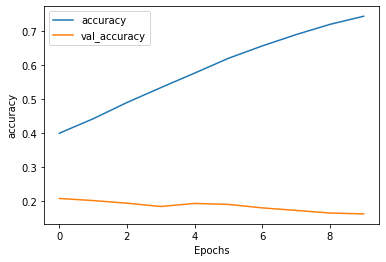

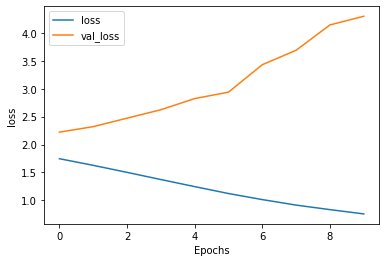

In [55]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [116]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(18, activation='sigmoid')
])


model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



In [117]:
num_epochs = 10
history = model2.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 37852 samples, validate on 9463 samples
Epoch 1/10
37852/37852 - 7s - loss: 2.3681 - accuracy: 0.2100 - val_loss: 2.3876 - val_accuracy: 0.0991
Epoch 2/10
37852/37852 - 6s - loss: 2.1482 - accuracy: 0.2243 - val_loss: 2.3260 - val_accuracy: 0.0999
Epoch 3/10
37852/37852 - 6s - loss: 2.1168 - accuracy: 0.2296 - val_loss: 2.3318 - val_accuracy: 0.1026
Epoch 4/10
37852/37852 - 6s - loss: 2.0850 - accuracy: 0.2438 - val_loss: 2.2673 - val_accuracy: 0.1564
Epoch 5/10
37852/37852 - 6s - loss: 2.0476 - accuracy: 0.2654 - val_loss: 2.2295 - val_accuracy: 0.1972
Epoch 6/10
37852/37852 - 6s - loss: 2.0100 - accuracy: 0.2948 - val_loss: 2.1808 - val_accuracy: 0.2148
Epoch 7/10
37852/37852 - 7s - loss: 1.9718 - accuracy: 0.3137 - val_loss: 2.1875 - val_accuracy: 0.2054
Epoch 8/10
37852/37852 - 7s - loss: 1.9348 - accuracy: 0.3281 - val_loss: 2.1761 - val_accuracy: 0.2074
Epoch 9/10
37852/37852 - 7s - loss: 1.9034 - accuracy: 0.3391 - val_loss: 2.1698 - val_accuracy: 0.2122
Epoch 10/10
378

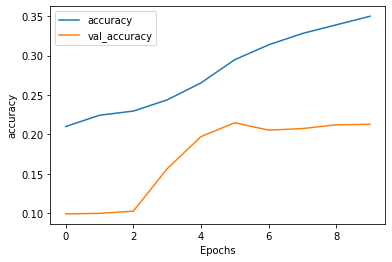

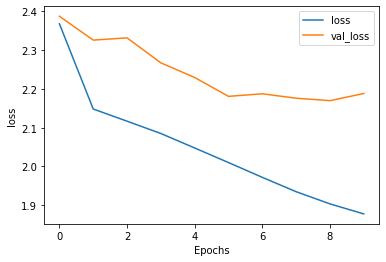

In [118]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [122]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.LSTM(embedding_dim),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu')
])


model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, None, 64)          640000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 18)                1170      
Total params: 760,786
Trainable params: 760,786
Non-trainable params: 0
_________________________________________________________________


In [123]:
num_epochs = 10
history = model3.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 37852 samples, validate on 9463 samples
Epoch 1/10
37852/37852 - 168s - loss: 6.7203 - accuracy: 0.2070 - val_loss: 5.0843 - val_accuracy: 0.0989
Epoch 2/10
37852/37852 - 143s - loss: 6.6988 - accuracy: 0.2121 - val_loss: 5.1999 - val_accuracy: 0.0984
Epoch 3/10
37852/37852 - 142s - loss: 6.6394 - accuracy: 0.2099 - val_loss: 5.3965 - val_accuracy: 0.0977
Epoch 4/10
37852/37852 - 155s - loss: 6.4185 - accuracy: 0.2038 - val_loss: 4.9997 - val_accuracy: 0.0961
Epoch 5/10
37852/37852 - 195s - loss: 6.3134 - accuracy: 0.2123 - val_loss: 4.9332 - val_accuracy: 0.1007
Epoch 6/10
37852/37852 - 142s - loss: 6.2243 - accuracy: 0.2091 - val_loss: 4.8738 - val_accuracy: 0.1027
Epoch 7/10
37852/37852 - 156s - loss: 6.2506 - accuracy: 0.1970 - val_loss: 4.8493 - val_accuracy: 0.1027
Epoch 8/10
37852/37852 - 142s - loss: 6.1665 - accuracy: 0.2101 - val_loss: 4.7995 - val_accuracy: 0.1023
Epoch 9/10
37852/37852 - 156s - loss: 6.1007 - accuracy: 0.2213 - val_loss: 4.7735 - val_accuracy: 0.10

In [61]:
print(validation_labels[1:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [121]:
data = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6, 'empty':7,
       'enthusiasm':8, 'neutral':9, 'worry':10, 'surprise':11, 'love':12, 'fun':13, 'hate':14, 'happiness':15,
       'boredom':16, 'relief':17}

txt = ["did you get them from california vintage? ahahah they have the BEST dresses, i want them but i dont have ebay"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred2 = model2.predict(padded)
pred3 = model3.predict(padded)
#labelss = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
#Do I get the sequence that generates this?
new_data ={j:i for i, j in data.items()}
print(pred, new_data[int(pred.argmax(1))])
print(pred2, new_data[int(pred2.argmax(1))])
print(pred3, new_data[int(pred3.argmax(1))])
#print(pred)
#print(new_data[int(pred.argmax(1))])
#print(type(pred.argmax(1)))
#print(labels[np.argmax(pred)])
#print(labels[10])
#print(labelsList[0])
#2 is business


[[1.0104062e-05 5.1513005e-05 1.8049548e-03 1.5142031e-01 1.6121319e-05
  5.7208210e-05 1.1063644e-05 4.7247026e-02 2.2868471e-02 2.6302594e-01
  1.9711654e-01 6.2125009e-02 4.1714594e-02 2.9185079e-02 2.4193930e-02
  1.2844053e-01 5.9043900e-03 2.4807163e-02]] neutral
[[8.3446503e-07 5.0663948e-07 7.4049830e-04 1.6683981e-01 4.1723251e-07
  6.2584877e-07 1.7881393e-06 3.2185286e-02 3.8834542e-02 1.7724824e-01
  3.2559007e-01 9.5627576e-02 1.2824270e-01 6.4335942e-02 6.6274494e-02
  1.2810025e-01 4.4609746e-03 4.2672671e-02]] worry
[[6.7827106e-04 3.1182170e-04 6.7723095e-03 4.0746197e-01 4.2647123e-05
  1.4877319e-04 2.5525689e-04 6.6640466e-02 6.3833326e-02 9.1943884e-01
  6.1446416e-01 2.3913389e-01 1.9465122e-01 9.8239064e-02 1.1125183e-01
  2.9886532e-01 1.5184512e-02 1.1160473e-01]] neutral


In [82]:
{j:i for i, j in data.items()}
  

{0: 'joy',
 1: 'fear',
 2: 'anger',
 3: 'sadness',
 4: 'disgust',
 5: 'shame',
 6: 'guilt',
 7: 'empty',
 8: 'enthusiasm',
 9: 'neutral',
 10: 'worry',
 11: 'surprise',
 12: 'love',
 13: 'fun',
 14: 'hate',
 15: 'happiness',
 16: 'boredom',
 17: 'relief'}

In [0]:
indices = [0, 1, 2, 3]
depth = 4
indices_of_news_tone = [0,1,2,3,4]
tf.one_hot(indices, depth)
labels = []
labelList = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
for item in labelList:
  labels.append(labelList.index(item))
#The plan is to hot encode each category
#This would give the probability value of each label

labelsTensor = tf.Variable(labels, tf.int32)
ys = tf.one_hot(labelsTensor, 5)
print(ys)

tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)


In [16]:
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import Model
from bert.tokenization.bert_tokenization import FullTokenizer

BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

def tokenize_sentences(sentence):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))

In [14]:
def tokenize_sentences(sentence):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))

In [134]:
from tensorflow import keras

reconstructed_model = keras.models.load_model("text_model_1")

In [173]:
txt = "Fotball is such a delight to watch"
seq = [tokenize_sentences(txt)]

padded = pad_sequences(seq, maxlen=max_length)
#print(padded)
paddy = np.asarray(padded)
#print(paddy)
pred = reconstructed_model.predict(padded)

#reconstructed_model.predict(np.asarray(padded))

#new_data ={j:i for i, j in dataLabels.items()}

#print(pred, new_data[int(pred.argmax(1))])

ValueError: invalid literal for int() with base 10: 'class_name'

In [163]:
train_sequences = [tokenize_sentences(sentence) for sentence in train_articles]
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = [tokenize_sentences(sentence) for sentence in validation_articles]
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [164]:
import numpy as np
train_x = np.asarray(train_padded)
train_y = np.asarray(train_labels)
validation_x = np.asarray(validation_padded)
validation_y = np.asarray(validation_labels)

In [165]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=18,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = tf.keras.layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = tf.keras.layers.GlobalMaxPool1D()
        
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units, activation="relu")
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = tf.keras.layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = tf.keras.layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [166]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 18

DROPOUT_RATE = 0.2

NB_EPOCHS = 10


text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [167]:
text_model.compile(loss="categorical_crossentropy",
                       optimizer="rmsprop",
                       metrics=["accuracy"])

In [168]:
history = text_model.fit(train_x, train_y, epochs=NB_EPOCHS, validation_data=(validation_x, validation_y), verbose=2)

Train on 37852 samples, validate on 9463 samples
Epoch 1/10
37852/37852 - 102s - loss: 2.1093 - accuracy: 0.2604 - val_loss: 2.1988 - val_accuracy: 0.2145
Epoch 2/10
37852/37852 - 89s - loss: 1.8929 - accuracy: 0.3402 - val_loss: 2.2420 - val_accuracy: 0.1978
Epoch 3/10
37852/37852 - 105s - loss: 1.7330 - accuracy: 0.3949 - val_loss: 2.2222 - val_accuracy: 0.2078
Epoch 4/10
37852/37852 - 111s - loss: 1.4635 - accuracy: 0.4962 - val_loss: 2.3298 - val_accuracy: 0.2108
Epoch 5/10
37852/37852 - 99s - loss: 1.1320 - accuracy: 0.6182 - val_loss: 3.1058 - val_accuracy: 0.1867
Epoch 6/10
37852/37852 - 73s - loss: 0.8467 - accuracy: 0.7203 - val_loss: 3.2190 - val_accuracy: 0.1597
Epoch 7/10
37852/37852 - 72s - loss: 0.6402 - accuracy: 0.7940 - val_loss: 3.9202 - val_accuracy: 0.1696
Epoch 8/10
37852/37852 - 88s - loss: 0.4991 - accuracy: 0.8388 - val_loss: 4.5302 - val_accuracy: 0.1399
Epoch 9/10
37852/37852 - 82s - loss: 0.3983 - accuracy: 0.8754 - val_loss: 4.9932 - val_accuracy: 0.1585
Epo

In [169]:
text_model.summary()

Model: "text_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     multiple                  6104400   
_________________________________________________________________
conv1d (Conv1D)              multiple                  40100     
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  60100     
_________________________________________________________________
conv1d_2 (Conv1D)            multiple                  80100     
_________________________________________________________________
global_max_pooling1d (Global multiple                  0         
_________________________________________________________________
dense_48 (Dense)             multiple                  77056     
_________________________________________________________________
dropout (Dropout)            multiple                  0

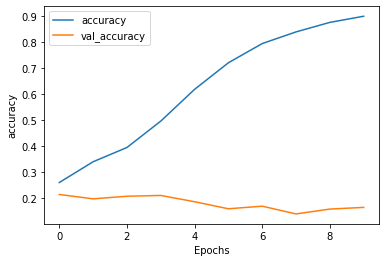

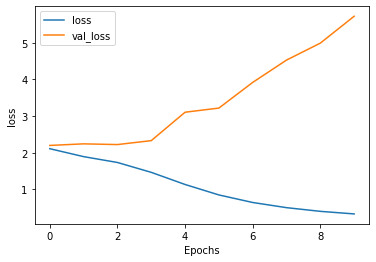

In [170]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [185]:
txt = "Died"
seq = [tokenize_sentences(txt)]

padded = pad_sequences(seq, maxlen=max_length)
pred = text_model.predict(padded)

new_data ={j:i for i, j in data.items()}

print(pred, new_data[int(pred.argmax(1))])

[[0.00020237 0.00223769 0.00600928 0.17520842 0.00106938 0.00091385
  0.00196226 0.12246724 0.02564196 0.17172955 0.19910535 0.11070473
  0.01627032 0.01296174 0.1104295  0.0170994  0.01038719 0.01559972]] worry


In [174]:
text_model.save("text_model_local")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: text_model_local/assets


INFO:tensorflow:Assets written to: text_model_local/assets


In [20]:
from tensorflow import keras

reconstructed_model_local = keras.models.load_model("text_model_local")

In [23]:
txt = "Great is thy faithfulness"
seq = [tokenize_sentences(txt)]

padded = pad_sequences(seq, maxlen=max_length)
#print(padded)
pred = reconstructed_model_local.predict(padded)

#reconstructed_model.predict(np.asarray(padded))

new_data ={j:i for i, j in data.items()}

print(pred, new_data[int(pred.argmax(1))])

[[3.1734456e-04 4.5017376e-05 1.6925253e-02 1.1950086e-02 9.1726033e-05
  6.3161319e-06 4.5593547e-06 4.1639429e-04 4.1489378e-03 2.9245805e-02
  3.1277472e-03 7.3270234e-03 5.7175380e-01 5.7214323e-02 3.6438106e-04
  6.3341595e-02 9.4713159e-06 2.3371018e-01]] love
